# Stereonets and geometric sample bias

Stereonets are a way of plotting structural data so spatial patterns become clear. They're a standard tool for structural geologists and borehole image analysts. Like any analysis, to draw a robust conclusion from patterns that appears on the stereonet requires a complete understanding the data including the biases acting on that dataset. 

Fracture data which has been picked from borehole image logs are subject to geometric sample bias because wells are simply lines (analogous to outcrop scanlines) and therefore can't generate a complete sample of a 3D network of planes (fractures). This geometric sample bias has been long recognised but there were no tools that visualised it along with the data. Wallis et al. (2020) developed Pythonic methods for visualising geometric sample bias as isogenic contours on a stereonet (after drawings in Terzaghi 1965) and calculating the weighted distribution. These tools will be made available through fractoolbox. 

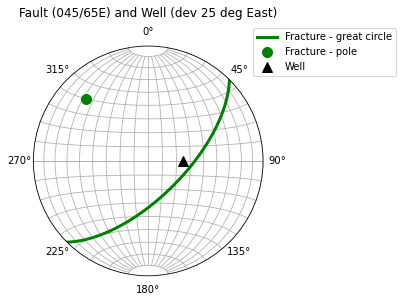

In [3]:
import mplstereonet as mpls
import matplotlib.pyplot as plt
%matplotlib inline

strike = 45
dip = 65

wellazimuth = 90  
wellplunge = 90 - 25 # 90 - deviation

fig = plt.figure(figsize=(14,5)) 

ax = fig.add_subplot(1,3,2, projection= 'equal_area_stereonet')

# plot the great circle
ax.plane(strike,dip,linestyle='-',color='g',linewidth=3,label='Fracture - great circle')

# plot the pole
ax.pole(strike,dip,marker='o',color='g',markersize=10,label='Fracture - pole')

# plot a line
ax.line(wellplunge,wellazimuth,marker='^',color='k',markersize=10,label='Well')

ax.grid()
    
ax.set_title('Fault (045/65E) and Well (dev 25 deg East)',y=1.1)
ax.legend(bbox_to_anchor=(1.6, 1.1), numpoints=1)

plt.show() 

## Geometric sample bias

Seminal work by Terzaghi (1965) revealed that a geometric bias is generated 
by sampling a three-dimensional fracture network with a line (outcrop scanline or well). 
Simply put, fractures planes that are perpendicular to the line are 
very likely to be intersected whereas those parallel to the line are 
almost never intersected. This geometric sample bias generates a 'blind
zone' in fracture dataset where fracture planes that are near-parallel to the
line are rarely sampled. This blind zone is sometimes also referred to as the 'well shadow'.

Terzaghi (1965) proposed a methodology which quantifies the geometric sample 
bias using the acute angle (alpha α) between the fracture plane and 
the line, where sin α = 1 is perpendicular to the well and sin α = 0 is parallel.

<img src="images/stereonets-04.png" alt="Drawing" style="width: 100px;"/>

Plotting the blind zone (where sin(alpha) +/- 0.3) and 
contours of sample bias (isogenic contours) on a stereonet enables
us to visually evaluate the degree that geometric sample bias 
affects a fracture dataset. 

<img src="images/stereonets-03.png" alt="Drawing" style="width: 400px;"/> 

The image below includes seven case study wells in four geothermal reservoirs
located in two tectonic settings (Wallis et al. 2020). It shows that all seven 
datasets are impacted by geometric sample bias. Where there is a strong 
fracture cluster lies within or near the blind zone (e.g., NM-B), the overall impact on 
the apparent distribution of fracture orientations may be reduced. 
However, less fractures will be sampled at low sin(alpha) so the numbers of 
fractures intersected in that cluster will still be less than is present in the reservoir. 

<img src="images/stereonets-02.png" alt="Drawing" style="width: 1200px;"/>


# Corrected fracture data

A weighting may be applied based on the alpha angle which may correct
the sampled fracture population to something more reflective of actual
frequency. It involves weighting fractures based on their alpha angle, 
where fractures with low alpha angels are emphasised and those with high 
alpha angles are de-emphasised. 

Fracture weighting is calculated using the following formula:

>$N_{w} = \frac {N_{0}} {sin(\alpha)}$

where $N_{0}$ is the number of fractures and $sin(\alpha)$ is the sine of the acute angle between the fracture and the well. 

This kind of correction is common-place in modern image log
analysis and some form of the Terzaghi correction comes baked into 
most log analysis software. However, there are two key issues with these
corrections:

-   Correction may mislead interpretation by emphasising solitary 
    fractures that are not part of some significant but under-sampled 
    population, especially where the weighting factor approaches 
    infinity near sin α = 0. Priest (1993) recommends resolving this 
    by using an upper limit of sin α = 0.1 when weighting.

-   Correction can only be applied to those fractures which were sampled
    and therefore does a poor job of correcting in the blind zone where
    fractures are rarely sampled.

An adapted Terzaghi correction that includes an upper limit (after Priest, 1993) will be included in fractoolbox.

<img src="images/stereonets-01.png" alt="Drawing" style="width: 1200px;"/>


## Citations

Priest, S., 1993, Discontinuity Analysis for Rock Engineering, Netherlands, Springer.

Terzaghi, R. D., 1965, Sources of error in joint surveys: Geotechnique, v. 15, no. 3, p. 287-304.

Wallis, I.C., Rowland, J. V. and Dempsey, D. E., Allan, G., Sidik, R., Martikno, R., McLean, K., Sihotang, M., Azis, M. and Baroek, M. 2020 (submitted) Approaches to imaging feedzone diversity with case studies from Sumatra, Indonesia, and the Taupō Volcanic Zone, New Zealand. New Zealand Geothermal Workshop: Waitangi, New Zealand.

In [4]:
%load_ext watermark
print('author:')
%watermark -a "Irene Wallis" -d
print('\n')
print('requirements:')
%watermark -v -p matplotlib,mplstereonet,watermark
print('\n')
%watermark -g

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
author:
Irene Wallis 2020-08-26


requirements:
CPython 3.7.7
IPython 7.15.0

matplotlib 3.2.2
mplstereonet 0.6.dev0
watermark 2.0.2


Git hash: ced2ee706465afc8c3cc66ea2efa3585722b6304
